# 1. Probelm statement:
In the competitive mobile phone market, companies like Apple, Samsung, Xiaomi, Nothing Phone want to understand sales data of mobile phones and factors which drive the prices of the mobile phones.

### Purpose of this ML model:
To find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.

*** We don't have to predict the actual price but a price range indicating how high the price is.

## 2. Data
Descriptions:

- Battery_power - Total energy a battery can store in one time measured in mAh
- Blue - Has bluetooth or not
- Clock_speed - speed at which microprocessor executes instructions
- Dual_sim - Has dual sim support or not
- Fc - Front Camera mega pixels
- Four_g - Has 4G or not
- Int_memory - Internal Memory in Gigabytes
- M_dep - Mobile Depth in cm
- Mobile_wt - Weight of mobile phone
- N_cores - Number of cores of processor
- Pc - Primary Camera mega pixels
- Px_height - Pixel Resolution Height
- Px_width - Pixel Resolution Width
- Ram - Random Access Memory in Mega
- Touch_screen - Has touch screen or not
- Wifi - Has wifi or not
- Sc_h - Screen Height of mobile in cm
- Sc_w - Screen Width of mobile in cm
- Talk_time - longest time that a single - battery charge will last when you are
- Three_g - Has 3G or not
- Wifi - Has wifi or not
- Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Get the workplace ready

In [ ]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the datasets
test_df = pd.read_csv('drive/MyDrive/Mobile_price_range_prediction/test.csv')
train_df = pd.read_csv('drive/MyDrive/Mobile_price_range_prediction/train.csv')

# Return the first 5 rows of the Dataframe
test_df.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# List out all columns in phone_test and phone_train
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Data Analysis

In [ ]:
# Data information
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
#Description of the data
test_df.describe()
test_df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [ ]:
train_df.describe()
train_df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
#checking whether there is duplicates or not
len(test_df[test_df.duplicated()])

0

In [ ]:
#checking whether there is duplicates or not
len(train_df[train_df.duplicated()])

0

In [ ]:
#The nunique () method returns the number of unique values for each column
test_df.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [ ]:
train_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#checking whether there is null values or not
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Exploratory Data Analysis
### Using train_df


### price

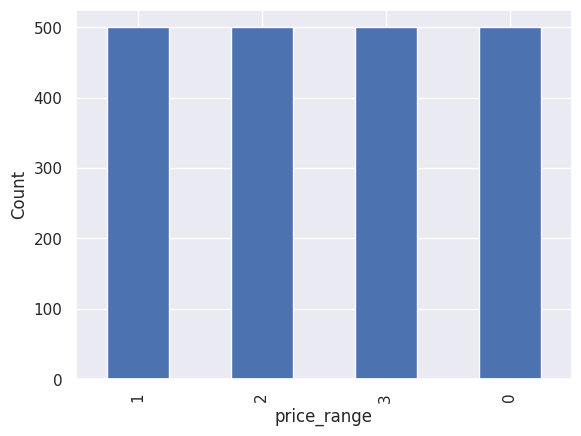

In [ ]:
#classes
sns.set()
price_plot=train_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

### There are mobile phones in 4 price ranges. The number of elements is almost similar.

### Battery power

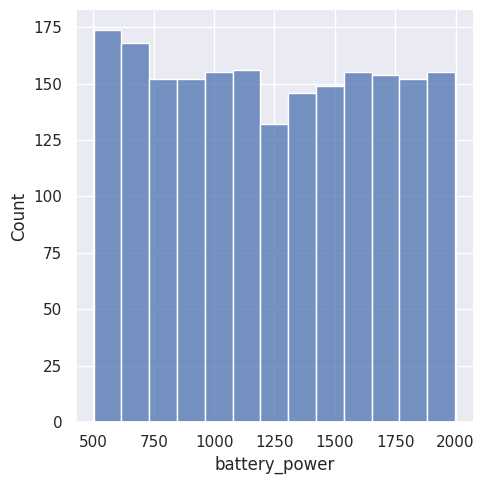

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(train_df["battery_power"])
plt.show()

### This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

### Bluetooth

<Axes: xlabel='blue', ylabel='price_range'>

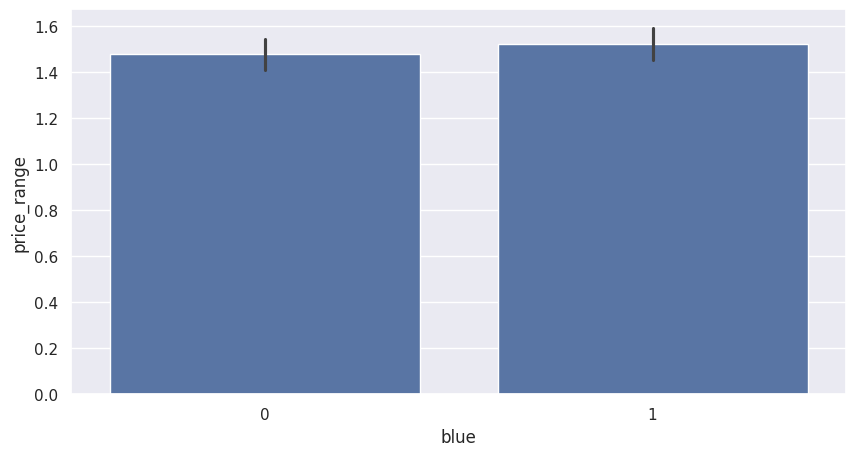

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=train_df,x='blue',y='price_range',ax=ax)

### Half the devices have Bluetooth, and half don’t.

### RAM

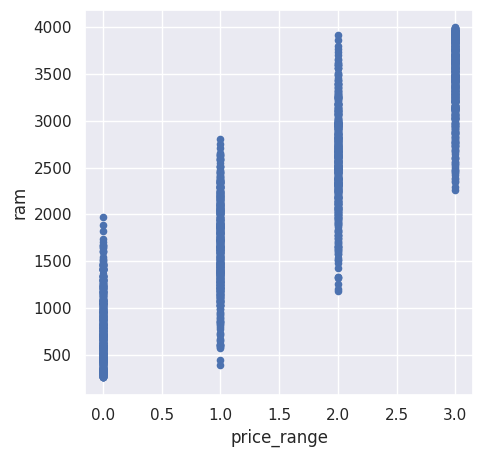

In [ ]:
train_df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

### Ram has continuous increase with price range while moving from Low cost to Very high cost

### Pixel Width (pixel_width)

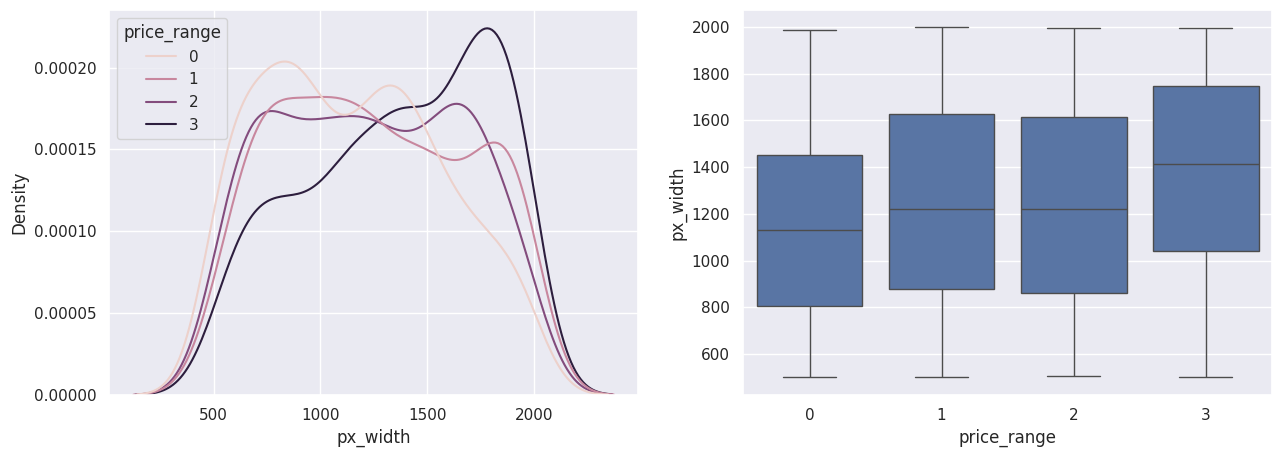

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=train_df, x='price_range', y='px_width', ax=axs[1])
plt.show()

### There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

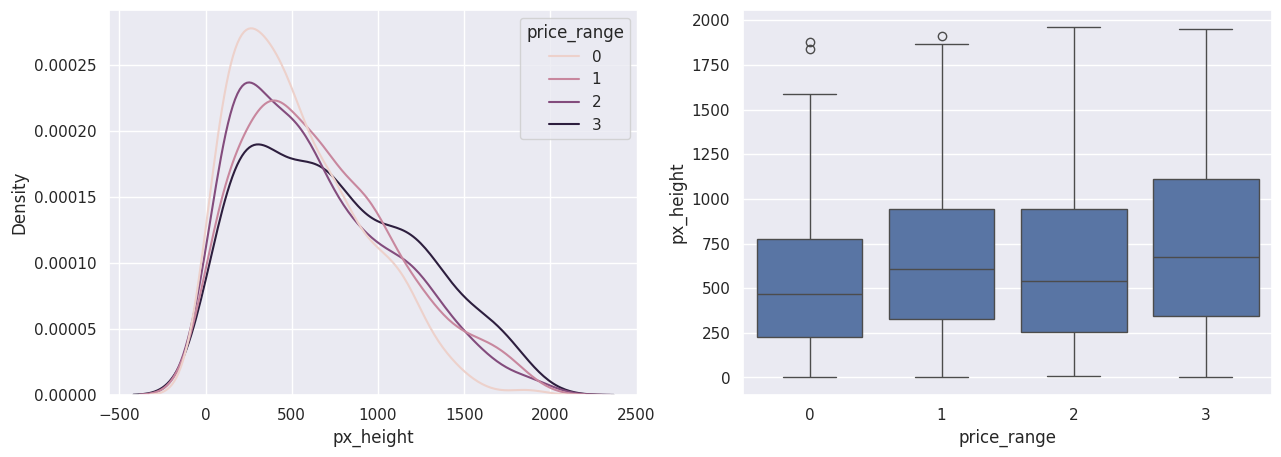

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=train_df, x='price_range', y='px_height', ax=axs[1])
plt.show()

### Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

### FC (front camera megapixels)

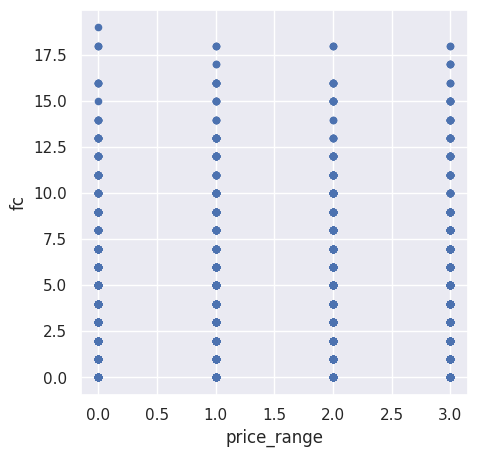

In [ ]:
train_df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

### This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

### PC (Primary camera Megapixels)

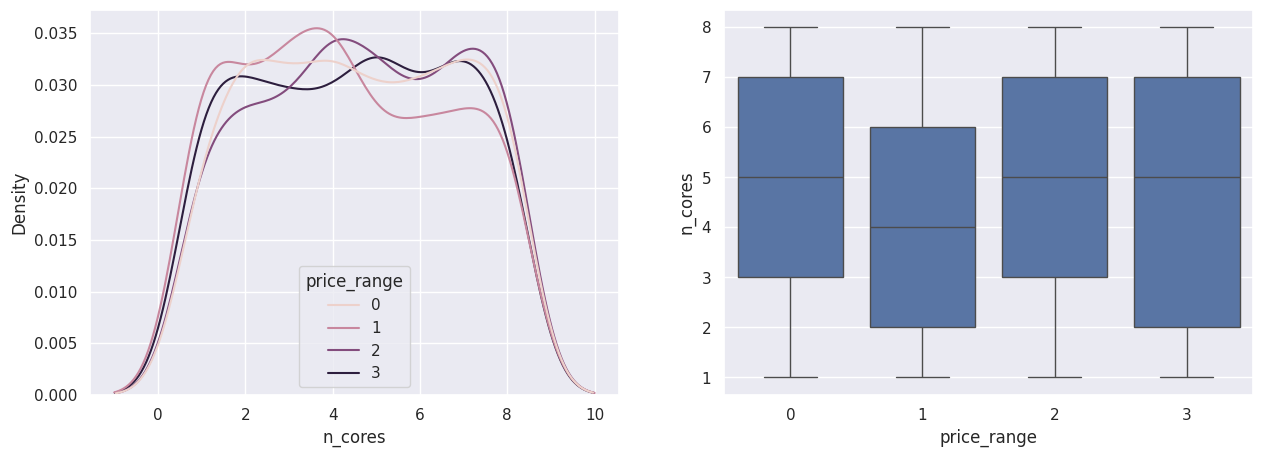

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=train_df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

### Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

### mobile weight

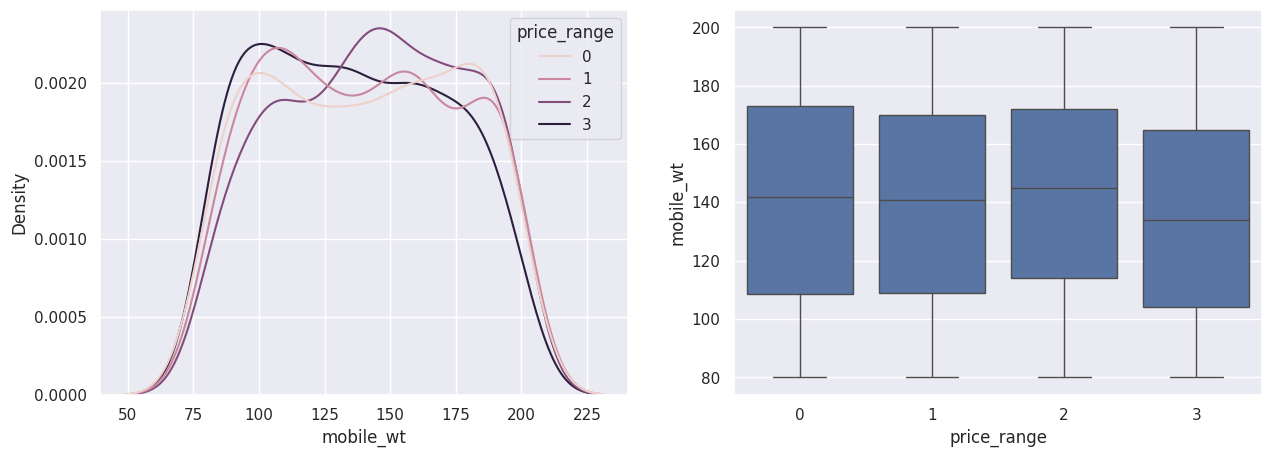

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=train_df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

### costly phones are lighter

### screen_size

 Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

In [ ]:
# Defining new variable sc_size

train_df['sc_size'] = np.sqrt((train_df['sc_h']**2) + (train_df['sc_w']**2))
train_df['sc_size'] = round(train_df['sc_size']/2.54, 2)

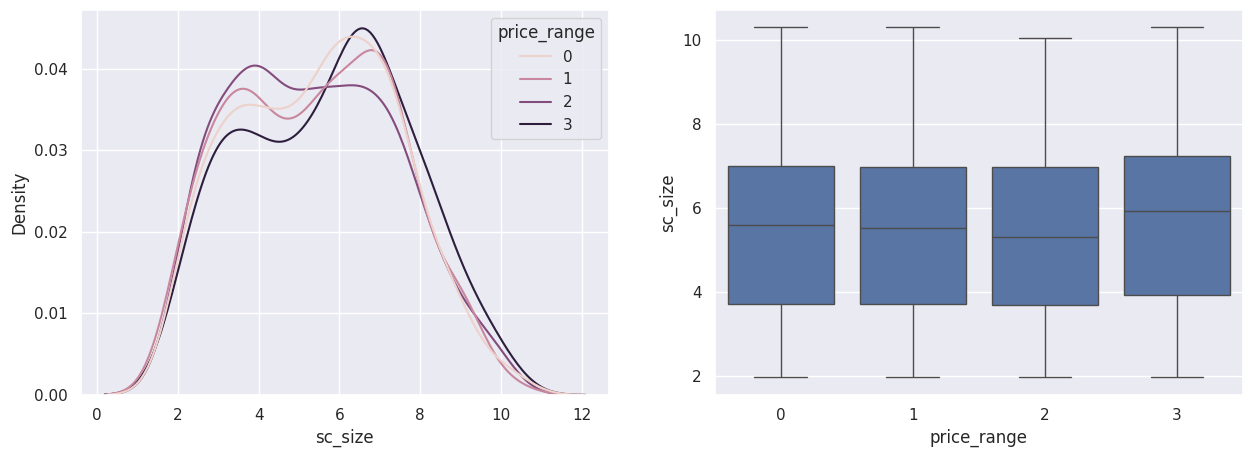

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=train_df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

In [ ]:
# Let's drop sc_h and s_w

train_df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
binary_features = [ 'four_g', 'three_g']

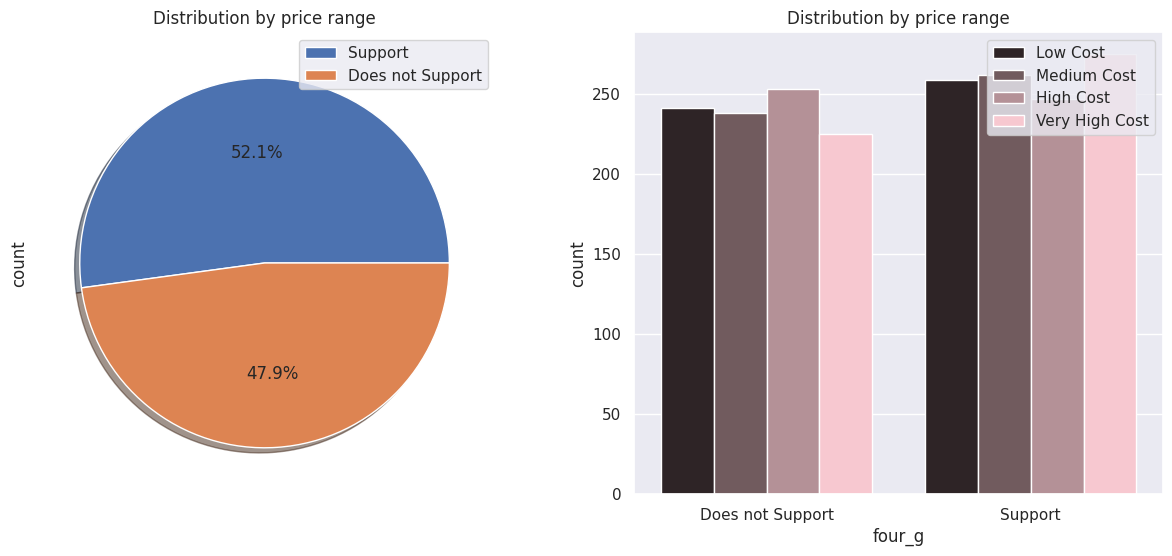

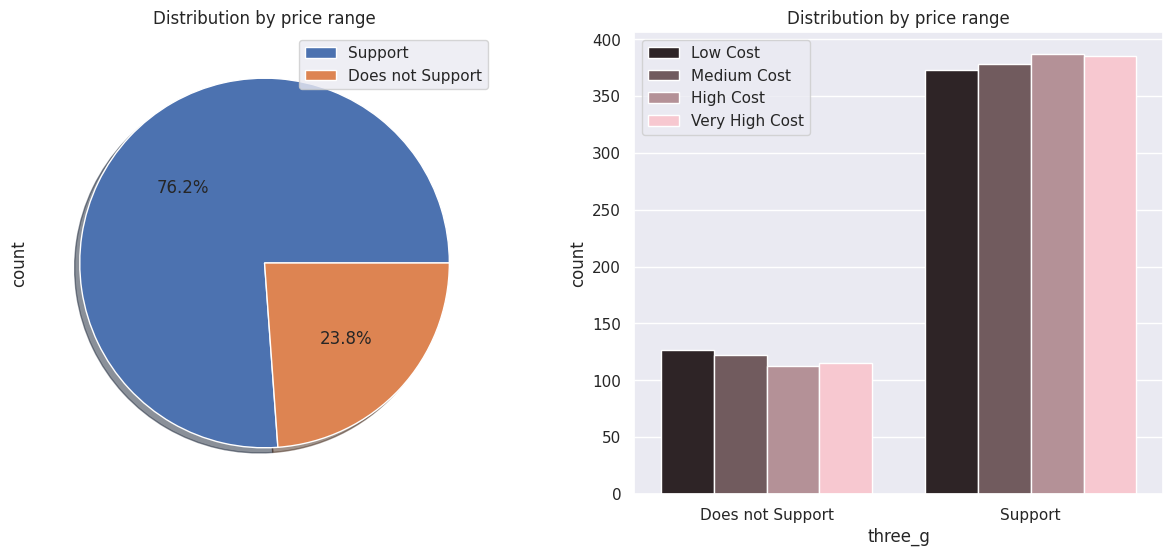

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  train_df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = train_df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

feature 'three_g' play an important feature in prediction

<Axes: >

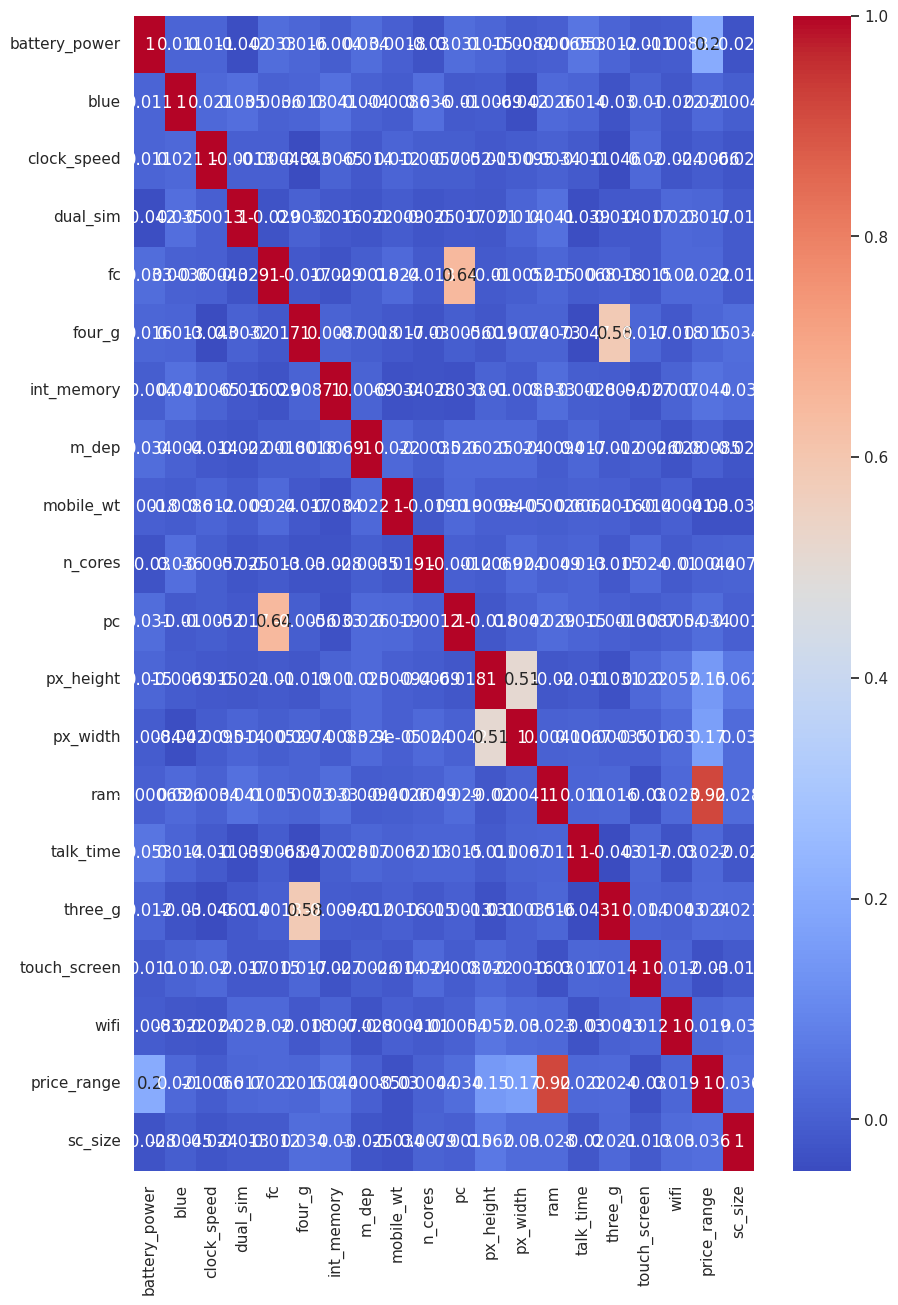

In [ ]:
# Checking for multi-collinearity

correlation = train_df.corr()
plt.figure(figsize = [10, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

<Axes: >

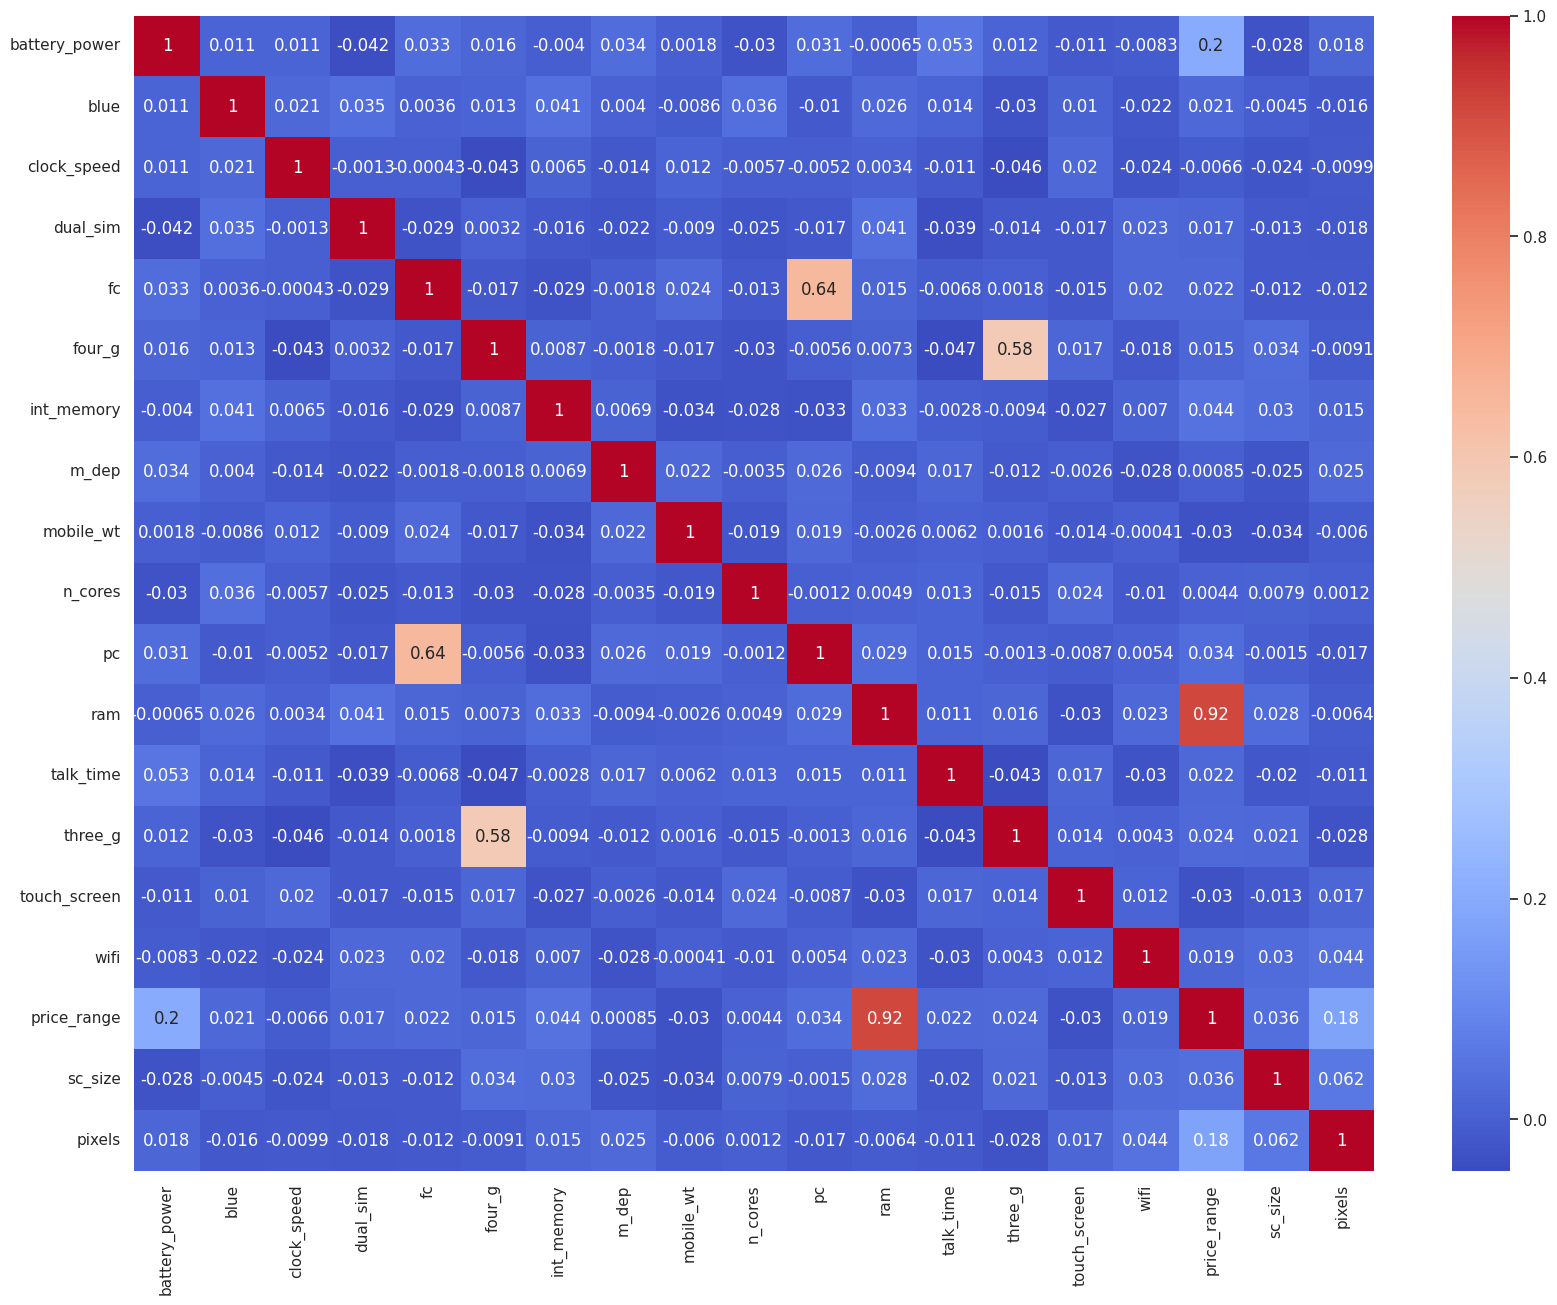

In [ ]:
#  defining new variable for pixels

train_df['pixels'] = train_df['px_height']*train_df['px_width']
# Dropping px_height and px_width

train_df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = train_df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

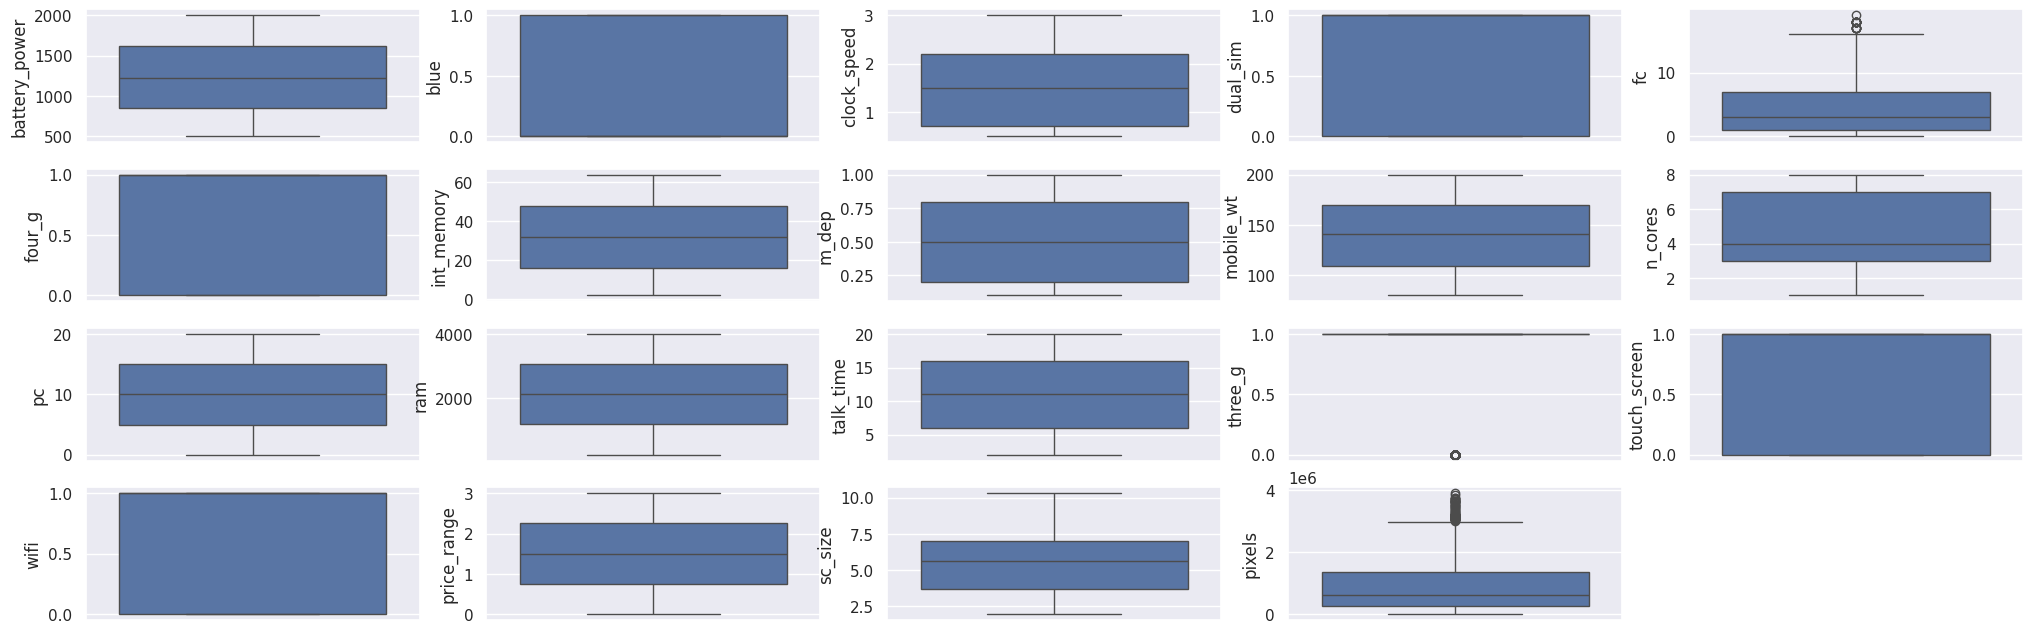

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in train_df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(train_df[item])
print("\n")

There are no much outliers

In [ ]:
# Split the data into features and target
X = train_df.drop(columns=['price_range'])
y = train_df['price_range']

# Normalize the feature values with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes for the price ranges
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 1.3291 - accuracy: 0.3363 - val_loss: 1.1844 - val_accuracy: 0.6125
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.9106 - accuracy: 0.6731 - val_loss: 0.6795 - val_accuracy: 0.7250
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7875 - val_loss: 0.4896 - val_accuracy: 0.8175
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8594 - val_loss: 0.3682 - val_accuracy: 0.8600
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8769 - val_loss: 0.3589 - val_accuracy: 0.8350
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8687 - val_loss: 0.2944 - val_accuracy: 0.8775
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.9100 - val_loss: 0.2518 - val_accuracy: 0.8925
Epoch 8/50
50/50 [==

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

13/13 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.9250
Validation Accuracy: 0.925000011920929


In [ ]:
# Predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.88      0.95      0.91        91
           2       0.90      0.86      0.88        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

[[100   5   0   0]
 [  3  86   2   0]
 [  0   7  79   6]
 [  0   0   7 105]]


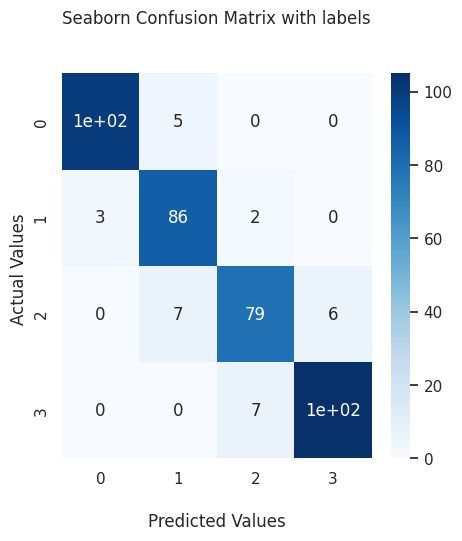

In [ ]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()